### LOAD LIBRARY

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

### LOAD DATASET

In [7]:
# Step 1: Load the California Housing Dataset
california_housing = fetch_california_housing()

# Display information about the dataset
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [23]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
# Step 2: Prepare the data
X = california_housing.data
y = california_housing.target

### SPLITTING DATA

In [9]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### CREATE LINEAR MODEL

In [10]:
#Step 4: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### PREDICTION OF MODEL

In [11]:
# Step 5: Make predictions on the test set
y_pred_linear = model.predict(X_test)

### EVALUATION OF MODEL

In [12]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.555891598695197


### PLOT

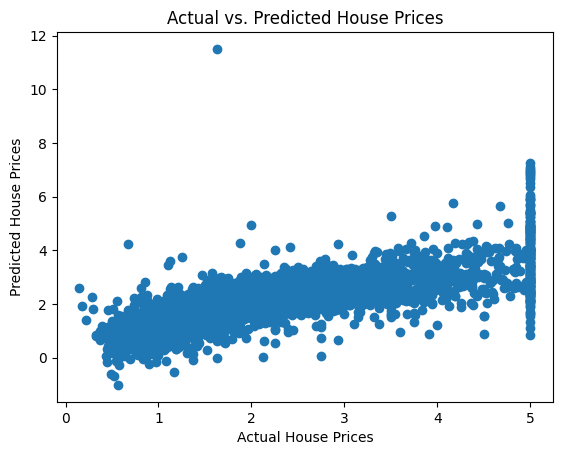

In [13]:
# Step 7: Visualize the results
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

### R^2 = 1 - Sum of squared residuals/Total sum of squares
If R^2 points to 1 then correct
else if it points to 0, then wrong
but if R^2=1 then it means overfitting

In [14]:
# R2
r2 = r2_score(y_test, y_pred_linear)
print("R2 --> ", r2)

R2 -->  0.575787706032487


### LASSO

In [15]:
# Step 6: Apply L1 (Lasso) regularization
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [16]:
# Step 7: Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')

Lasso Regression - Mean Squared Error: 0.5444512542055013


In [17]:
# R2
r2 = r2_score(y_test, y_pred_lasso)
print("R2 --> ", r2)

R2 -->  0.5845180678352985


### RIDGE

In [18]:
# Step 6: Apply L2 (Ridge) regularization
ridge_model = Ridge(alpha=0.01)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [19]:
# Step 7: Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')

Ridge Regression - Mean Squared Error: 0.5558907139436936


### ELASTIC NET

In [20]:
# Step 6: Apply Elastic Net regularization
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.6)  # You can adjust the alpha and l1_ratio parameters
elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)

In [21]:
# Step 7: Evaluate the Elastic Net model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print(f'Elastic Net Regression - Mean Squared Error: {mse_elastic_net}')

Elastic Net Regression - Mean Squared Error: 0.5453619279026607


### PLOT

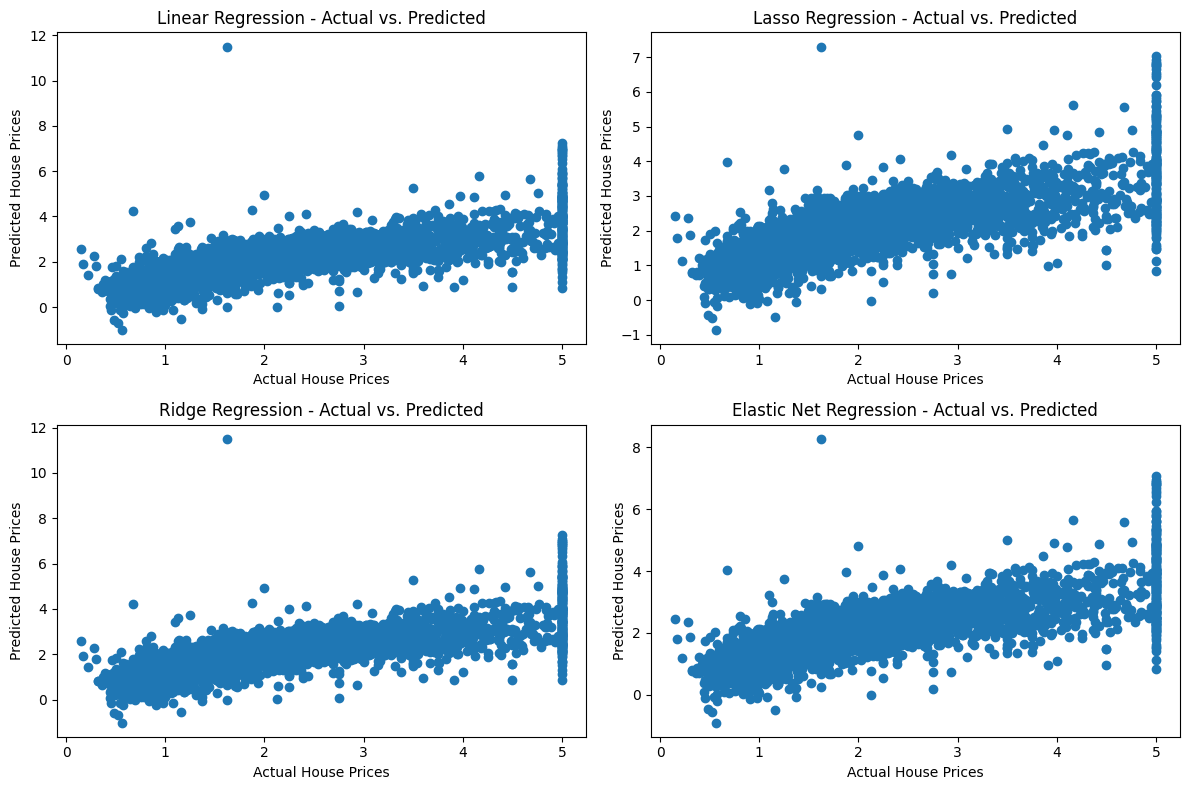

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_lasso)
plt.title('Lasso Regression - Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_ridge)
plt.title('Ridge Regression - Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_elastic_net)
plt.title('Elastic Net Regression - Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.tight_layout()
plt.show()